# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Import Data

In [2]:
df= pd.read_csv('time_series_tol.csv',index_col="Date",parse_dates=["Date"])
df

,lalin
Date,
2020-01-01,87731
2020-01-02,82907
2020-01-03,80181
2020-01-04,82990
2020-01-05,78905
...,...
2022-04-26,85472
2022-04-27,93109
2022-04-28,89983


# 3. Data Prepocessing

In [3]:
cols=list()

In [4]:
for i in range(1,0,-1):
    cols.append(df.shift(i))
cols

[              lalin
 Date               
 2020-01-01      NaN
 2020-01-02  87731.0
 2020-01-03  82907.0
 2020-01-04  80181.0
 2020-01-05  82990.0
 ...             ...
 2022-04-26  80758.0
 2022-04-27  85472.0
 2022-04-28  93109.0
 2022-04-29  89983.0
 2022-04-30  82257.0
 
 [851 rows x 1 columns]]

In [5]:
for i in range(0,1):
    print(i)
    cols.append(df.shift(i))
cols

0


[              lalin
 Date               
 2020-01-01      NaN
 2020-01-02  87731.0
 2020-01-03  82907.0
 2020-01-04  80181.0
 2020-01-05  82990.0
 ...             ...
 2022-04-26  80758.0
 2022-04-27  85472.0
 2022-04-28  93109.0
 2022-04-29  89983.0
 2022-04-30  82257.0
 
 [851 rows x 1 columns],
             lalin
 Date             
 2020-01-01  87731
 2020-01-02  82907
 2020-01-03  80181
 2020-01-04  82990
 2020-01-05  78905
 ...           ...
 2022-04-26  85472
 2022-04-27  93109
 2022-04-28  89983
 2022-04-29  82257
 2022-04-30  80041
 
 [851 rows x 1 columns]]

In [6]:
agg=pd.concat(cols,axis=1)
agg

,lalin,lalin
Date,,
2020-01-01,NaN,87731
2020-01-02,87731.0,82907
2020-01-03,82907.0,80181
2020-01-04,80181.0,82990
2020-01-05,82990.0,78905
...,...,...
2022-04-26,80758.0,85472
2022-04-27,85472.0,93109
2022-04-28,93109.0,89983


In [7]:
agg.dropna(inplace=True)
agg

,lalin,lalin
Date,,
2020-01-02,87731.0,82907
2020-01-03,82907.0,80181
2020-01-04,80181.0,82990
2020-01-05,82990.0,78905
2020-01-06,78905.0,78578
...,...,...
2022-04-26,80758.0,85472
2022-04-27,85472.0,93109
2022-04-28,93109.0,89983


# 4. Train Test Split

In [8]:
train,test=agg.iloc[:-10,:],agg.iloc[-10:,:]

In [9]:
train

,lalin,lalin
Date,,
2020-01-02,87731.0,82907
2020-01-03,82907.0,80181
2020-01-04,80181.0,82990
2020-01-05,82990.0,78905
2020-01-06,78905.0,78578
...,...,...
2022-04-16,60891.0,60192
2022-04-17,60192.0,69717
2022-04-18,69717.0,71980


In [10]:
test

,lalin,lalin
Date,,
2022-04-21,72945.0,77348
2022-04-22,77348.0,77976
2022-04-23,77976.0,68026
2022-04-24,68026.0,76130
2022-04-25,76130.0,80758
2022-04-26,80758.0,85472
2022-04-27,85472.0,93109
2022-04-28,93109.0,89983
2022-04-29,89983.0,82257


In [11]:
trainX=train.iloc[:,:-1]
trainX

,lalin
Date,
2020-01-02,87731.0
2020-01-03,82907.0
2020-01-04,80181.0
2020-01-05,82990.0
2020-01-06,78905.0
...,...
2022-04-16,60891.0
2022-04-17,60192.0
2022-04-18,69717.0


In [12]:
trainy=train.iloc[:,-1]
trainy

Date
2020-01-02    82907
2020-01-03    80181
2020-01-04    82990
2020-01-05    78905
2020-01-06    78578
              ...  
2022-04-16    60192
2022-04-17    69717
2022-04-18    71980
2022-04-19    72040
2022-04-20    72945
Name: lalin, Length: 840, dtype: int64

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

model=LinearRegression()
model.fit(trainX,trainy)

LinearRegression()

# 6. Prediction

In [14]:
actual=list()
predictions=list()
for i in range(len(test)):
    testX,testy=test.iloc[i,:-1],test.iloc[i,-1]
    pred=model.predict([testX])
    print("hasil prediksi :"+str(pred[0]))
    predictions.append(pred[0])
    actual.append(testy)
    print("actual: "+str(testy)+" predicted= "+str(pred[0]))

hasil prediksi :71674.84029410222
actual: 77348 predicted= 71674.84029410222
hasil prediksi :75607.16668244443
actual: 77976 predicted= 75607.16668244443
hasil prediksi :76168.03449345485
actual: 68026 predicted= 76168.03449345485
hasil prediksi :67281.67347505718
actual: 76130 predicted= 67281.67347505718
hasil prediksi :74519.36892159937
actual: 80758 predicted= 74519.36892159937
hasil prediksi :78652.64317216664
actual: 85472 predicted= 78652.64317216664
hasil prediksi :82862.72416118441
actual: 93109 predicted= 82862.72416118441
hasil prediksi :89683.34115590833
actual: 89983 predicted= 89683.34115590833
hasil prediksi :86891.50552339465
actual: 82257 predicted= 86891.50552339465
hasil prediksi :79991.40248539059
actual: 80041 predicted= 79991.40248539059


C:\Users\Hisyam Ramadhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Hisyam Ramadhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Hisyam Ramadhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Hisyam Ramadhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Hisyam Ramadhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarn

In [15]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(actual,predictions)
print(error)

5332.037966899634


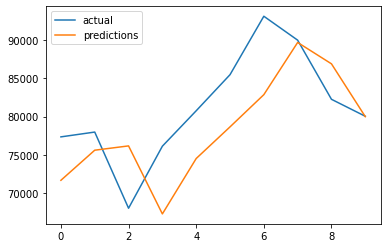

In [16]:
plt.plot(actual, label="actual")
plt.plot(predictions, label="predictions")
plt.legend()
plt.show()

# 7. DataFrame New

In [17]:
df_visual = pd.DataFrame({
    'date':test.reset_index()["Date"].to_list(),
    'actual':actual,
    'predictions':predictions
})
df_visual

,date,actual,predictions
0,2022-04-21,77348,71674.840294
1,2022-04-22,77976,75607.166682
2,2022-04-23,68026,76168.034493
3,2022-04-24,76130,67281.673475
4,2022-04-25,80758,74519.368922
5,2022-04-26,85472,78652.643172
6,2022-04-27,93109,82862.724161
7,2022-04-28,89983,89683.341156
8,2022-04-29,82257,86891.505523
9,2022-04-30,80041,79991.402485


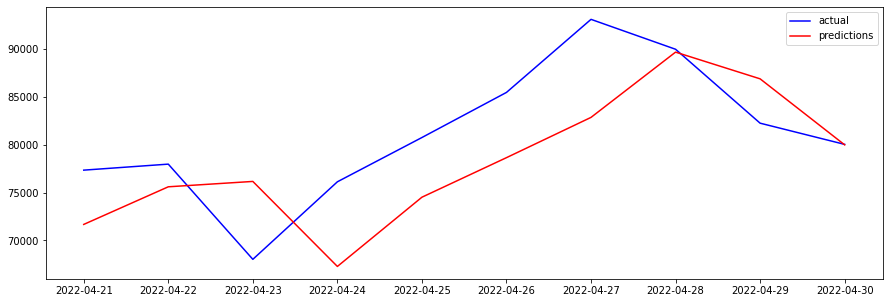

In [18]:
df_visual.set_index('date',inplace=True)
df_visual
plt.figure(figsize=(15,5))
plt.plot(df_visual.actual,"b-",label="actual")
plt.plot(df_visual.predictions,"r-",label="predictions")
plt.legend()
plt.show()

# 8. Predicted

In [19]:
result=pd.concat([df,df_visual],axis=1)
result=result.drop(columns='actual')
result

,lalin,predictions
2020-01-01,87731,NaN
2020-01-02,82907,NaN
2020-01-03,80181,NaN
2020-01-04,82990,NaN
2020-01-05,78905,NaN
...,...,...
2022-04-26,85472,78652.643172
2022-04-27,93109,82862.724161
2022-04-28,89983,89683.341156
2022-04-29,82257,86891.505523


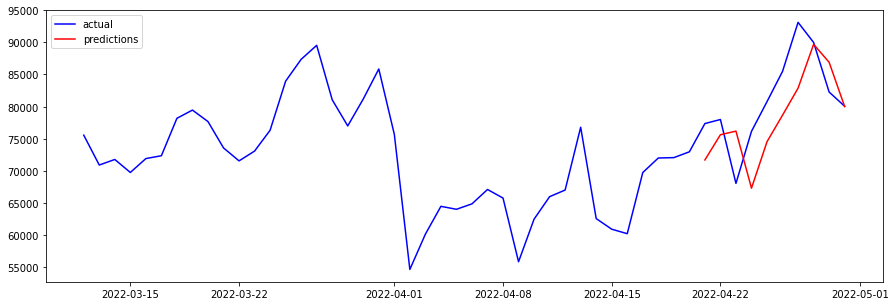

In [20]:
plt.figure(figsize=(15,5))
plt.plot(result.lalin[-50:],"b-",label="actual")
plt.plot(result.predictions,"r-",label="predictions")
plt.legend()
plt.show()

# 9. Forecasting

In [21]:
df_visual

,actual,predictions
date,,
2022-04-21,77348,71674.840294
2022-04-22,77976,75607.166682
2022-04-23,68026,76168.034493
2022-04-24,76130,67281.673475
2022-04-25,80758,74519.368922
2022-04-26,85472,78652.643172
2022-04-27,93109,82862.724161
2022-04-28,89983,89683.341156
2022-04-29,82257,86891.505523


In [22]:
actual2=list()
predictions2=list()
for i in range(len(test)):
    testX,testy=df_visual.iloc[i,:-1],df_visual.iloc[i,-1]
    pred=model.predict([testX])
    print("hasil prediksi :"+str(pred[0]))
    predictions2.append(pred[0])
    actual2.append(testy)
    print("actual: "+str(testy)+" predicted= "+str(pred[0]))

hasil prediksi :75607.16668244443
actual: 71674.84029410222 predicted= 75607.16668244443
hasil prediksi :76168.03449345485
actual: 75607.16668244443 predicted= 76168.03449345485
hasil prediksi :67281.67347505718
actual: 76168.03449345485 predicted= 67281.67347505718
hasil prediksi :74519.36892159937
actual: 67281.67347505718 predicted= 74519.36892159937
hasil prediksi :78652.64317216664
actual: 74519.36892159937 predicted= 78652.64317216664
hasil prediksi :82862.72416118441
actual: 78652.64317216664 predicted= 82862.72416118441
hasil prediksi :89683.34115590833
actual: 82862.72416118441 predicted= 89683.34115590833
hasil prediksi :86891.50552339465
actual: 89683.34115590833 predicted= 86891.50552339465
hasil prediksi :79991.40248539059
actual: 86891.50552339465 predicted= 79991.40248539059
hasil prediksi :78012.28931787609
actual: 79991.40248539059 predicted= 78012.28931787609


C:\Users\Hisyam Ramadhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Hisyam Ramadhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Hisyam Ramadhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Hisyam Ramadhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Hisyam Ramadhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarn

In [23]:
for i in range(len(predictions2)):
    predictions.append(predictions2[i])

In [24]:
predict2=pd.Series(predictions,pd.date_range(('20220421'),freq='d',periods=20))

In [25]:
predict2=pd.DataFrame(predict2,columns=["pred"])
result2=pd.concat([df,predict2],axis=1)
result2

,lalin,pred
2020-01-01,87731.0,NaN
2020-01-02,82907.0,NaN
2020-01-03,80181.0,NaN
2020-01-04,82990.0,NaN
2020-01-05,78905.0,NaN
...,...,...
2022-05-06,NaN,82862.724161
2022-05-07,NaN,89683.341156
2022-05-08,NaN,86891.505523
2022-05-09,NaN,79991.402485


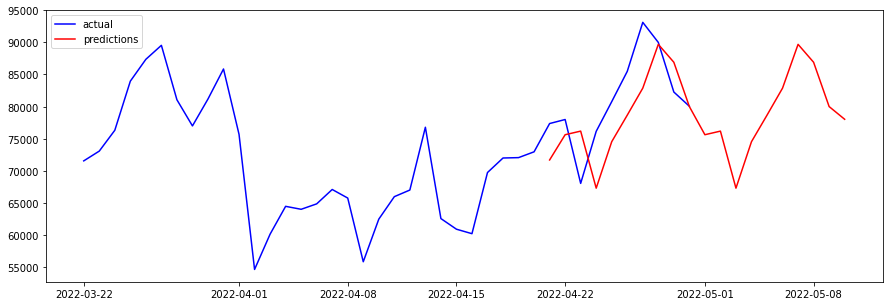

In [26]:
plt.figure(figsize=(15,5))
plt.plot(result2.lalin[-50:],"b-",label="actual")
plt.plot(result2.pred,"r-",label="predictions")
plt.legend()
plt.show()

# 10. Prescriptive

In [27]:
max(predictions)

89683.34115590833

In [28]:
result2[result2.pred>80000]

,lalin,pred
2022-04-27,93109.0,82862.724161
2022-04-28,89983.0,89683.341156
2022-04-29,82257.0,86891.505523
2022-05-06,NaN,82862.724161
2022-05-07,NaN,89683.341156
2022-05-08,NaN,86891.505523


In [29]:
result2.describe()

,lalin,pred
count,851.000000,20.000000
mean,61475.132785,78650.142488
std,14307.491662,6451.871658
min,12572.000000,67281.673475
25%,54662.500000,75335.217242
50%,63039.000000,78332.466245
75%,71625.000000,82862.724161
max,93109.000000,89683.341156


Berdasarkan forecasting yang telah dilakukan dapat diprediksikan bahwa pada tanggal 7 Mei 2022 merupakan puncak arus mudik dengan jumlah kendaraan yang melintas sebanyak 89683 kendaraan. Sehingga diperlukan adanya rekayasa lalu lintas